In [209]:
## pandas and numpy
import pandas as pd
import numpy as np
## visualizations
import matplotlib.pyplot as plt
import seaborn as sns
## Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
## other
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Importing the data

In [15]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [18]:
print(df1.shape)
df1.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [21]:
print(df2.shape)
df2.head()

(1000, 21)


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


### Info and data description

In [10]:
def datainfo():
    print('\n\nDF1')
    print(df1.info())
    print('\n\nDF2')
    print(df2.info())

In [30]:
# datainfo()

In [27]:
# df1.describe().transpose()

In [28]:
# df2.describe().transpose()

###  Null value analysis

In [31]:
# df1.isnull().sum()
# df2.isnull().sum()

### No Null values are present.

### Lets now seperate our clean data into tests and train! 

In [33]:
df = df1.copy()
test = df2.copy()

### Data Analysis and Feature Engineering

In [40]:
def datadistrib():
    for i in df.columns:
        print(i)
        plt.figure(figsize=(10,5))
        sns.histplot(df[i],kde=True,color='b')
        plt.grid()
        plt.show()
        print('\n\n')
        plt.figure(figsize=(10,5))
        sns.boxplot(df[i],color='b')
        plt.grid()
        plt.show()

battery_power


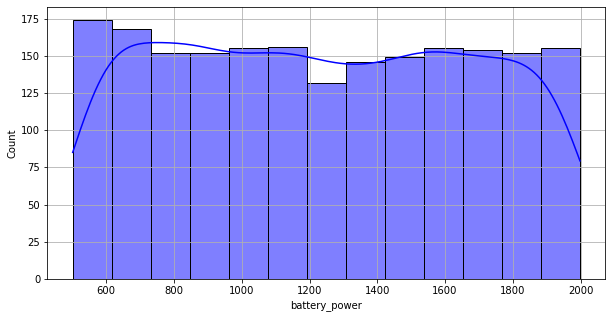

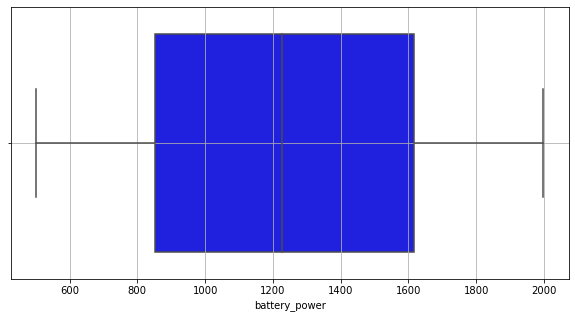

blue


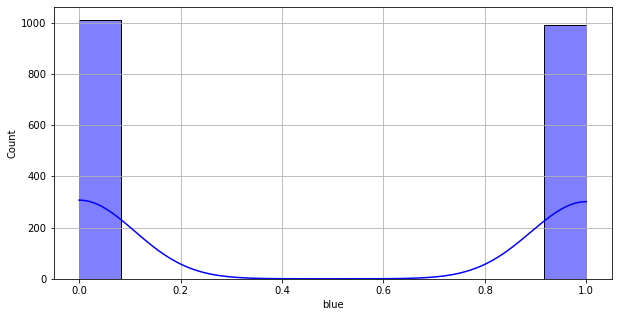

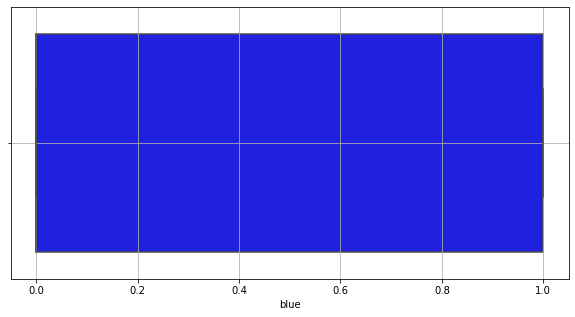

clock_speed


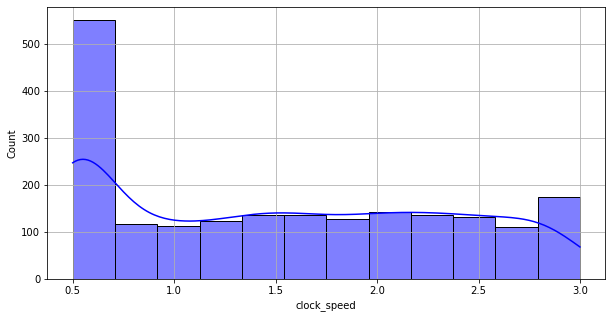

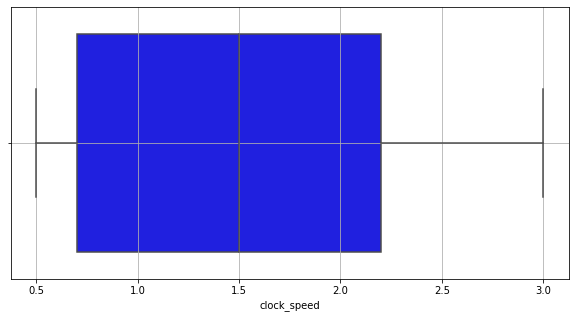

dual_sim


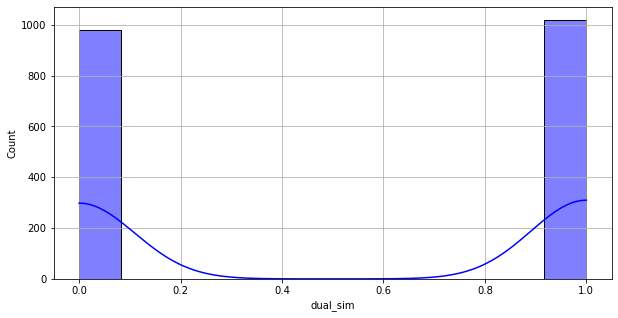

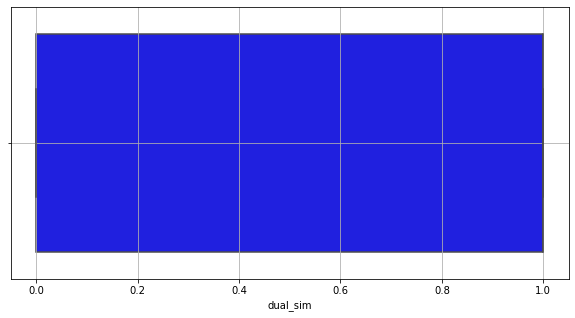

fc


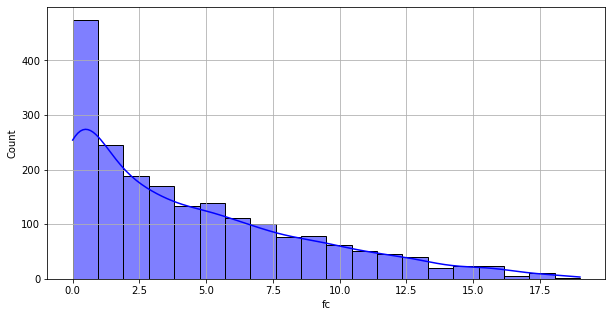

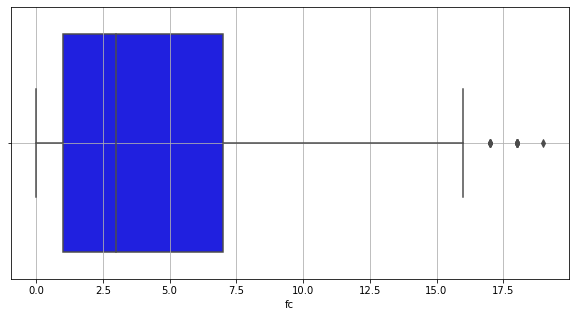

four_g


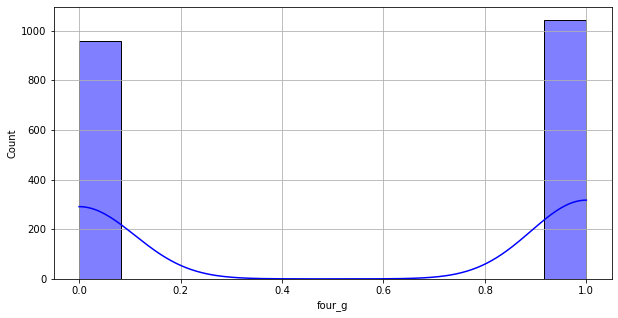

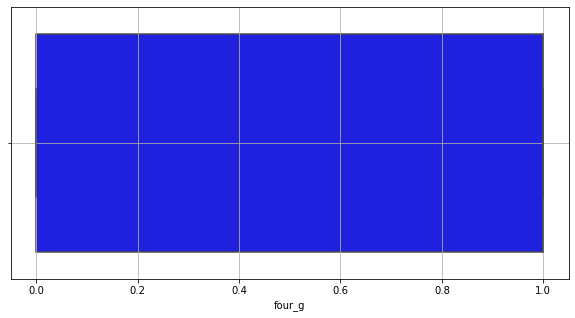

int_memory


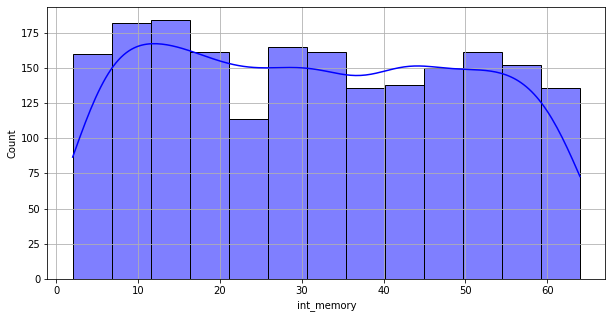

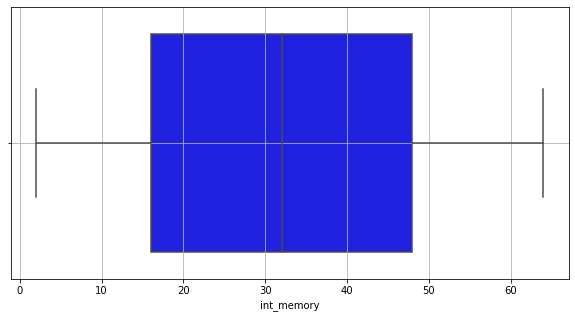

m_dep


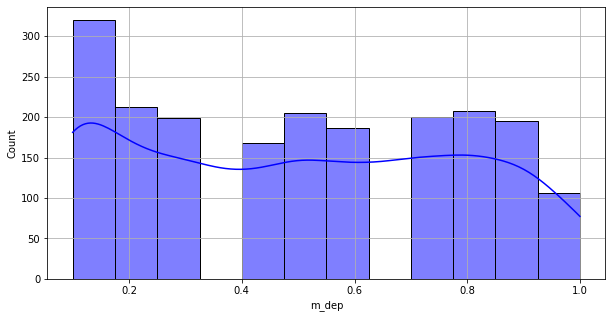

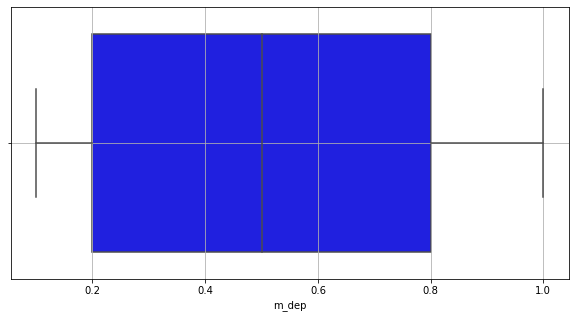

mobile_wt


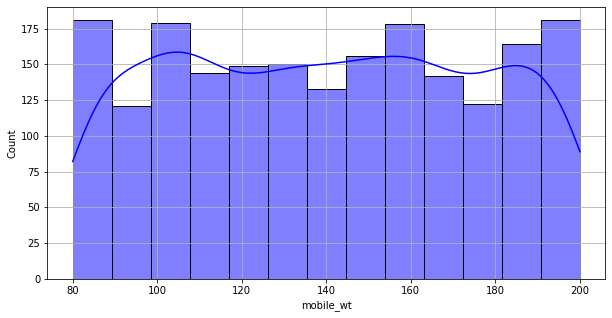

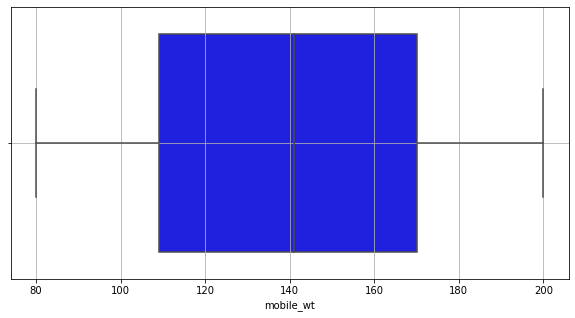

n_cores


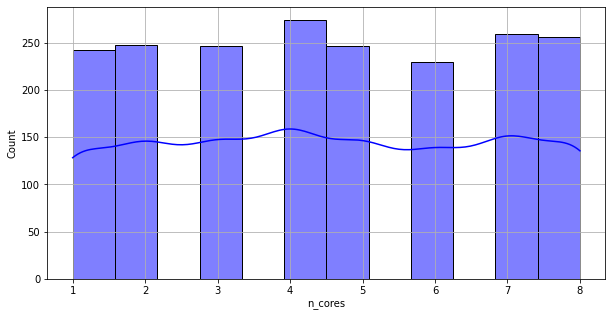

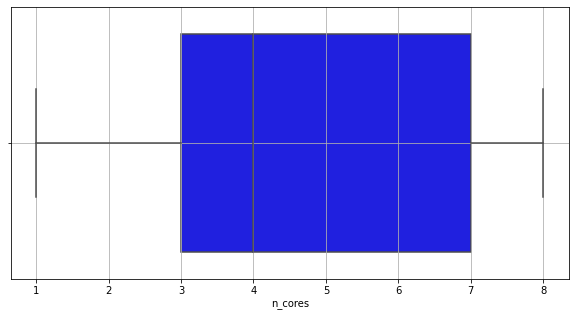

pc


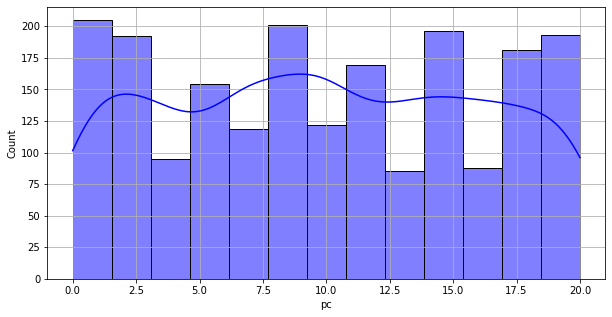

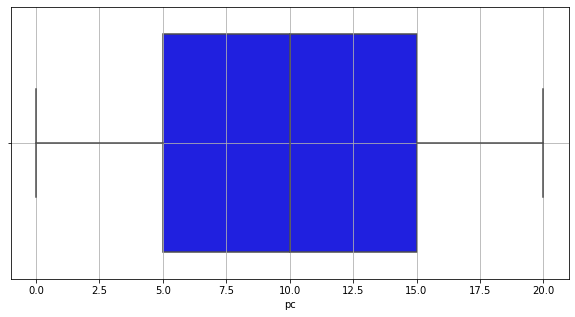

px_height


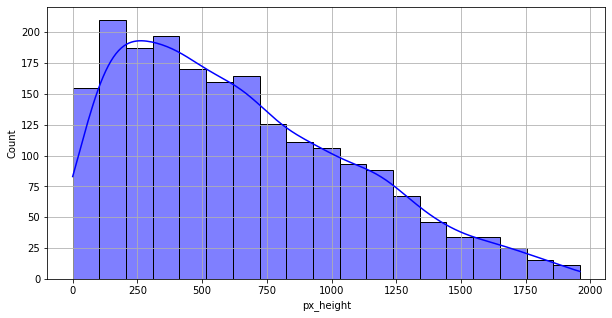

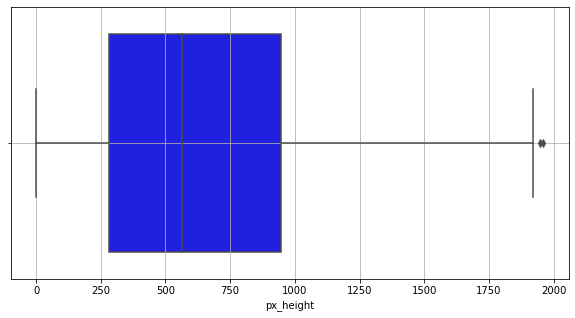

px_width


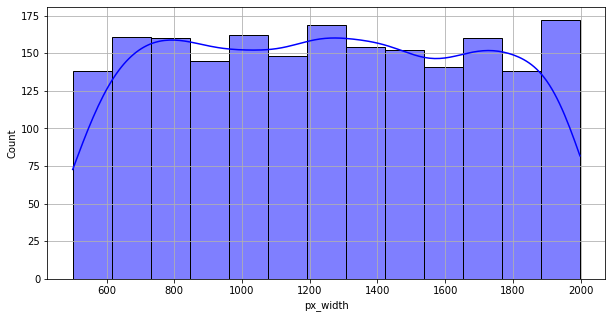

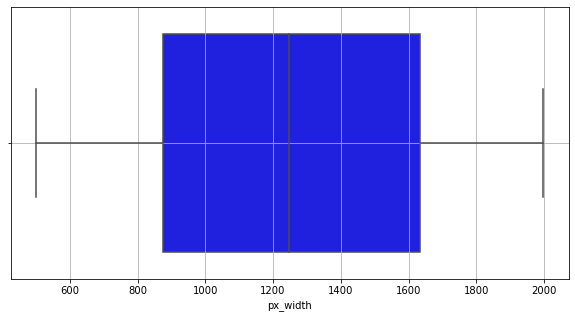

ram


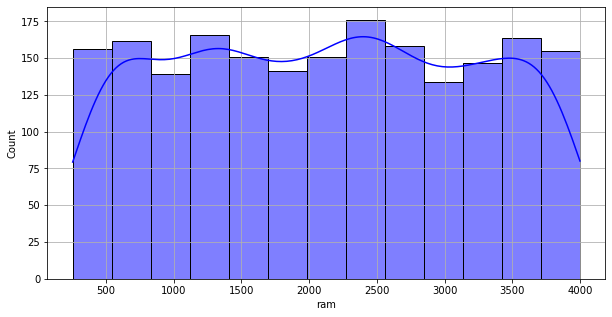

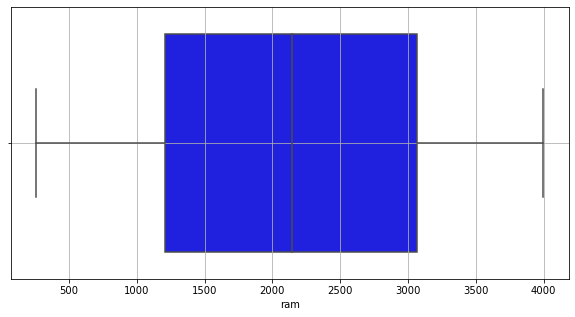

sc_h


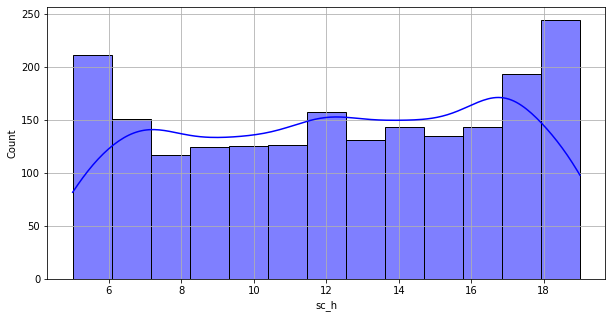

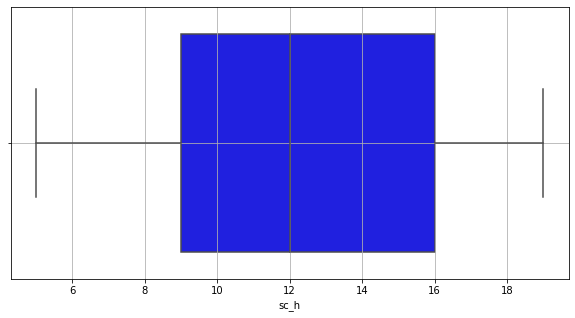

sc_w


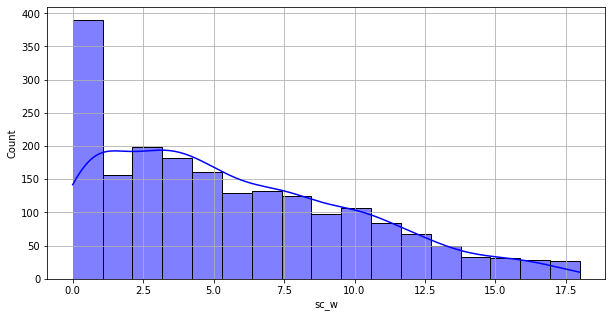

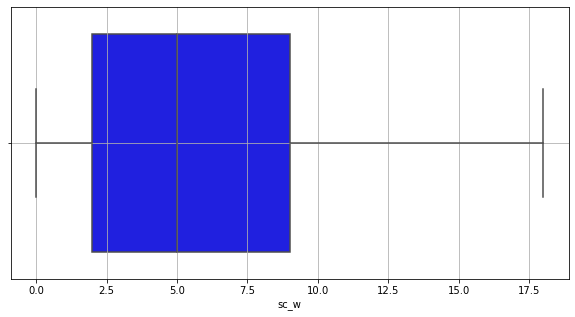

talk_time


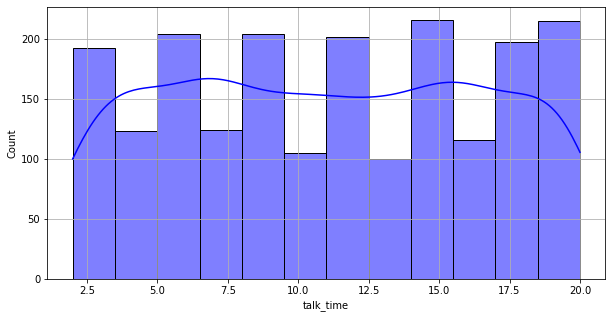

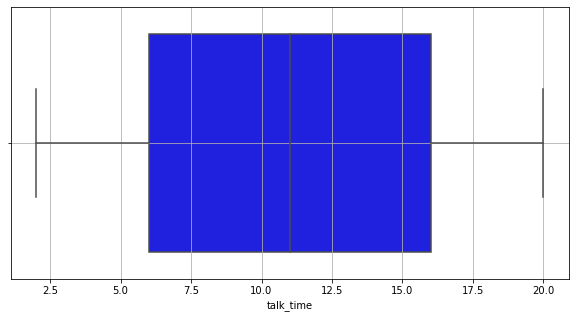

three_g


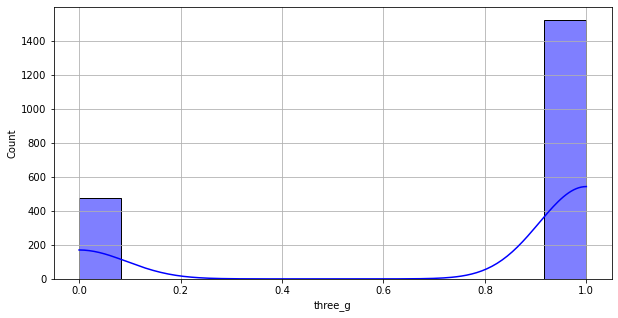

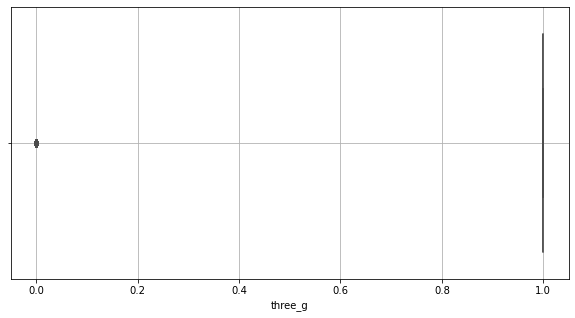

touch_screen


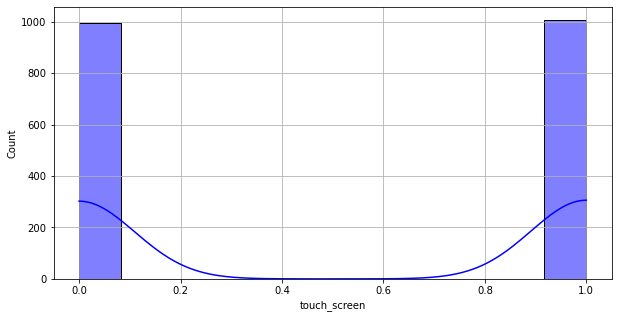

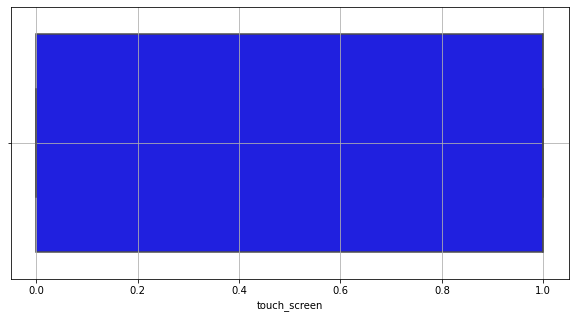

wifi


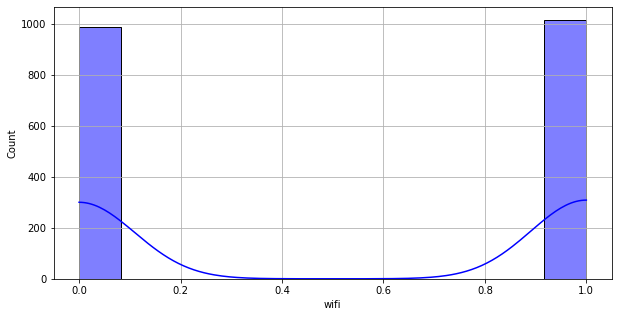

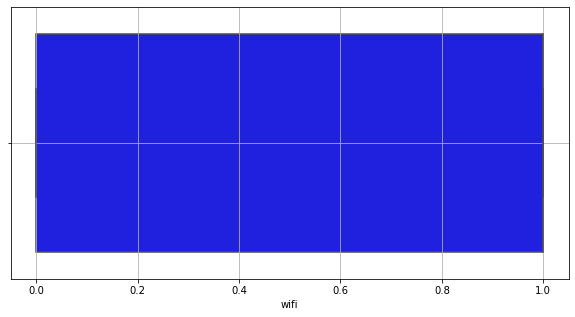

price_range


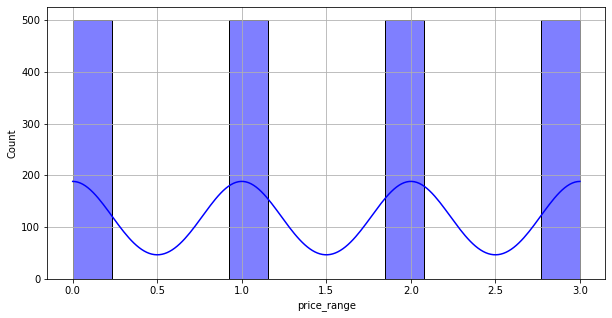

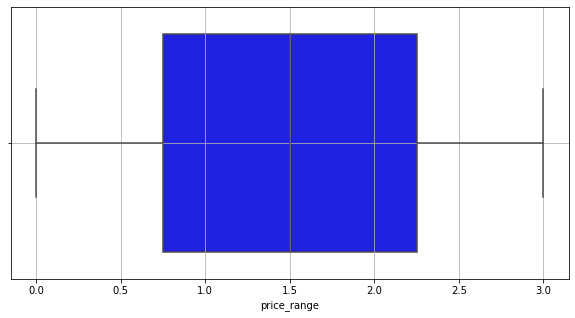

In [90]:
datadistrib()

### Except the "fc" feature, the rest of the features do not have outliers. which is good. 

### Lets see how imbalanced the data is

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


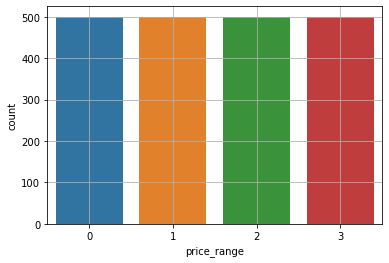

In [47]:
sns.countplot(df.price_range)
plt.grid()
print(df.price_range.value_counts())
plt.show()

### The data is perfectly balanced between the 4 classes! 

### how is battery power affecting the price range 

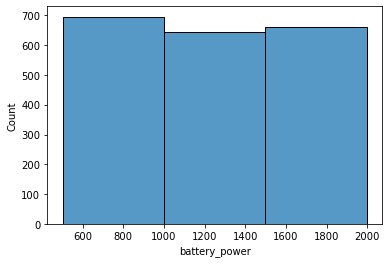

In [101]:
# sns.boxplot(df.battery_power)
sns.histplot(df.battery_power,bins=3)
# plt.grid()
plt.show()


In [95]:
# q1 = np.percentile(df.battery_power, 25, interpolation='midpoint')
# q3 = np.percentile(df.battery_power, 75, interpolation='midpoint')
# q2 = df.battery_power.median()
# iqr = q3 - q1
# print('Q1  :',q1)
# print('Q2  :',q2)
# print('Q3  :',q3)
# print('IQR :',iqr)
# print('upper range for outlier :',q3+(1.5*iqr))
# print('upper range for outlier :',q1-(1.5*iqr))

In [103]:
bpc = []
for i in df.battery_power:
    if i < 1001:
        bpc.append('low')
    elif 1001 <= i < 1501:
        bpc.append('medium')
    elif i >= 1501:
        bpc.append('high')
df['battery_power_category'] = bpc

In [105]:
col = df.pop('battery_power_category')
df.insert(1,'battery_power_category',col)

In [110]:
bpc = pd.DataFrame(df.price_range.groupby(df.battery_power_category).value_counts())
bpc['percentage'] = round(pd.DataFrame(df.price_range.groupby(df.battery_power_category).value_counts(normalize=True))*100,2)

In [116]:
op = pd.DataFrame(df.battery_power_category.groupby(df.price_range).value_counts())
op['percentage'] = round(pd.DataFrame(df.battery_power_category.groupby(df.price_range).value_counts(normalize=True))*100,2)

In [118]:
op.rename(columns={'battery_power_category':'count'})

count  percentage
price_range battery_power_category                   
0           low                       226        45.2
            medium                    167        33.4
            high                      107        21.4
1           medium                    178        35.6
            low                       169        33.8
            high                      153        30.6
2           low                       187        37.4
            high                      174        34.8
            medium                    139        27.8
3           high                      228        45.6
            medium                    157        31.4
            low                       115        23.0

In [112]:
bpc.rename(columns={'price_range':'count'})

count  percentage
battery_power_category price_range                   
high                   3              228       34.44
                       2              174       26.28
                       1              153       23.11
                       0              107       16.16
low                    0              226       32.42
                       2              187       26.83
                       1              169       24.25
                       3              115       16.50
medium                 1              178       27.77
                       0              167       26.05
                       3              157       24.49
                       2              139       21.68

In [125]:
pd.DataFrame(df.battery_power.groupby(df.price_range).mean().sort_values(ascending=False))

,battery_power
price_range,
3,1379.984
1,1228.868
2,1228.320
0,1116.902


### Inference : 
1. The data makes sense, as the 34.4% of the PR3 phones have high battery capacity. 
2. only 16% of highest end PR3 phones have low capacity batteries
3. But surprisingly, 37% of the PR2 phones have low capacity batteries.
4. supporting to inference 3, the average battery capacity of a PR2 phone is only 1228. which is lower than a PR1 phone. 
5. We can tell that the battery power plays some role in deciding the price. (they are somewhat directly proportional)

### Does "Blue" influence the price ?

In [129]:
blue_pr = pd.DataFrame(df.price_range.groupby(df.blue).value_counts())
blue_pr['percentage'] = round(pd.DataFrame(df.price_range.groupby(df.blue).value_counts(normalize=True))*100,2)

In [131]:
op = pd.DataFrame(df.blue.groupby(df.price_range).value_counts())
op['percentage'] = round(pd.DataFrame(df.blue.groupby(df.price_range).value_counts(normalize=True))*100,2)

In [136]:
op.rename(columns={'blue':'count'})

count  percentage
price_range blue                   
0           0       257        51.4
            1       243        48.6
1           0       255        51.0
            1       245        49.0
2           0       257        51.4
            1       243        48.6
3           1       259        51.8
            0       241        48.2

In [135]:
blue_pr.rename(columns={'price_range':'count'})

count  percentage
blue price_range                   
0    0              257       25.45
     2              257       25.45
     1              255       25.25
     3              241       23.86
1    3              259       26.16
     1              245       24.75
     0              243       24.55
     2              243       24.55

### Inference : Blue does not play any role in deciding the price of a phone

### Lets see if anything correlates with the price range! 

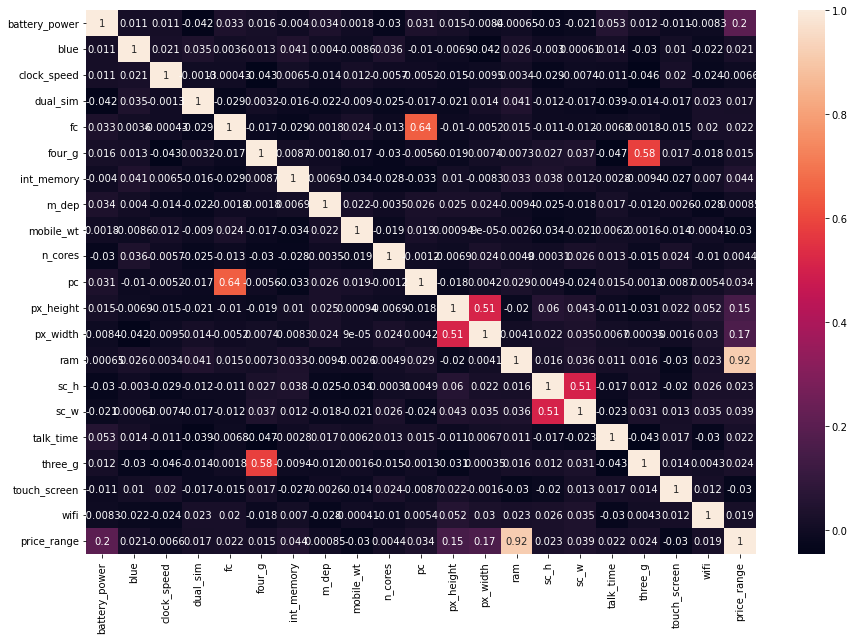

In [140]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Quite clearly, we have the "RAM" being the only feature with the highest correlation with the target. We have a 92% correlation with the price range

In [152]:
np.linspace(df.ram.min(), df.ram.max())

array([ 256.        ,  332.36734694,  408.73469388,  485.10204082,
        561.46938776,  637.83673469,  714.20408163,  790.57142857,
        866.93877551,  943.30612245, 1019.67346939, 1096.04081633,
       1172.40816327, 1248.7755102 , 1325.14285714, 1401.51020408,
       1477.87755102, 1554.24489796, 1630.6122449 , 1706.97959184,
       1783.34693878, 1859.71428571, 1936.08163265, 2012.44897959,
       2088.81632653, 2165.18367347, 2241.55102041, 2317.91836735,
       2394.28571429, 2470.65306122, 2547.02040816, 2623.3877551 ,
       2699.75510204, 2776.12244898, 2852.48979592, 2928.85714286,
       3005.2244898 , 3081.59183673, 3157.95918367, 3234.32653061,
       3310.69387755, 3387.06122449, 3463.42857143, 3539.79591837,
       3616.16326531, 3692.53061224, 3768.89795918, 3845.26530612,
       3921.63265306, 3998.        ])

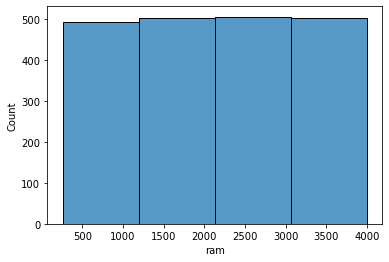

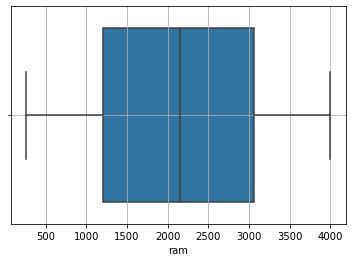

In [160]:
sns.histplot(df.ram,bins=4)
plt.show()

sns.boxplot(df.ram)
plt.grid()
plt.show()

In [157]:
q1 = np.percentile(df.ram,25)
q2 = np.percentile(df.ram,50)
q3 = np.percentile(df.ram,75)

In [161]:
q1,q3

(1207.5, 3064.5)

In [162]:
rc = []
for i in df.ram:
    if i < 1001:
        rc.append('less than 1gb')
    elif 1001 <= i < 2001:
        rc.append('1 to 2 gb')
    elif 2001 <= i < 3001:
        rc.append('2 to 3 gb')
    elif i >= 3001:
        rc.append('greater than 3 gb')
df['ram_catg'] = rc

In [170]:
col = df.pop('ram_catg')
df.insert(15,'ram_catg',col)

In [178]:
ram_pr = pd.DataFrame(df.ram_catg.groupby(df.price_range).value_counts())
ram_pr['percentage'] = round(pd.DataFrame(df.ram_catg.groupby(df.price_range).value_counts(True))*100,2)

In [179]:
ram_pr

ram_catg  percentage
price_range ram_catg                               
0           less than 1gb           365        73.0
            1 to 2 gb               135        27.0
1           1 to 2 gb               329        65.8
            2 to 3 gb               138        27.6
            less than 1gb            33         6.6
2           2 to 3 gb               350        70.0
            greater than 3 gb        92        18.4
            1 to 2 gb                58        11.6
3           greater than 3 gb       432        86.4
            2 to 3 gb                68        13.6

In [192]:
print(df.ram.groupby(df.price_range).mean().sort_values(ascending=False),'\n')

price_range
3    3449.232
2    2582.816
1    1679.490
0     785.314
Name: ram, dtype: float64 



### Inference: 
1. Now this clearly marks the difference! the ram increases, the price increases!
2. We can also see that the price range 0 does not have any phones with more than 2gb ram. 
3. The price range 1 phones have 3 categories,
    1. less than 1 gb : 6.6%
    2. 1 to 2         : 66%
    3. 2 to 3.        : 27.6%
4. price range 2 phones also have 3 categories. 
    1. 1 to 2         : 11.6%
    2. 2 to 3         : 70%
    3. greater than 3 : 18.4%
5. the PR 3 phones have no phones with less tha 2 gb ram. 
    1. 2 to 3         : 13.5%
    2. more than 3 gb : 86.5%
    
    
### So we can conclude, 
1. Majority of phones have less than 1GB ram for phones in tier 0
2. Majority of phones have 1 to 2 gb ram for phones in tier 1
3. Majority of phones have 2 to 3 gb ram for phones in tier 2
4. Majority of phones have more than 3 gb ram for phones in tier 3

### Lets also check the mean px height and px width wrt the price range

In [202]:
df.px_height.groupby(df.price_range).mean().sort_values(ascending=False)

price_range
3    744.848
1    666.892
2    632.284
0    536.408
Name: px_height, dtype: float64

In [204]:
df.px_width.groupby(df.price_range).mean().sort_values(ascending=False)

price_range
3    1369.838
1    1251.908
2    1234.046
0    1150.270
Name: px_width, dtype: float64

### We can get an idea that for the phones on the top tier, the average px_height and the px_width are higher and for the phones on the lowest tier, the px_height and px_width are the lowest.

### Let's now try and predict what the price catg. of the test data set will be! 

In [213]:
ml = df.copy()

In [214]:
ml.head()

,battery_power,battery_power_category,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,ram_catg,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,low,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,2 to 3 gb,9,7,19,0,0,1,1
1,1021,medium,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,2 to 3 gb,17,3,7,1,1,0,2
2,563,low,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,2 to 3 gb,11,2,9,1,1,0,2
3,615,low,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,2 to 3 gb,16,8,11,1,0,0,2
4,1821,high,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,1 to 2 gb,8,2,15,1,1,0,1


### Lets verify the balance of our data again

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


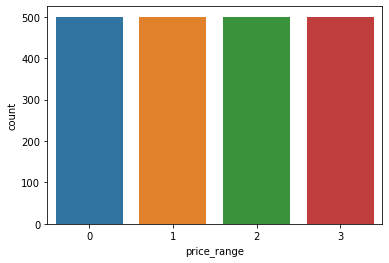

In [222]:
sns.countplot(ml.price_range)
print(ml.price_range.value_counts())
plt.show()

### Droppin the newly created columns as they are of categorical type and wont be needed! 

In [215]:
for i in ml.columns:
    if ml[i].dtypes == 'object':
        print(i)

battery_power_category
ram_catg


In [216]:
ml.drop(['battery_power_category','ram_catg'],axis=1,inplace=True)

In [217]:
ml.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [218]:
## models 
lr = LogisticRegression()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
xgbrf = XGBRFClassifier()
cat = CatBoostClassifier(verbose=False)
lgb = LGBMClassifier()

In [220]:
x = ml.drop('price_range',axis=1)
y = ml.price_range

In [221]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15, random_state=43)

In [226]:
lr.fit(xtrain,ytrain)
lr_test_pred = lr.predict(xtest)
lr_test_acc = accuracy_score(ytest,lr_test_pred)
lr_test_cf = confusion_matrix(ytest,lr_test_pred)
lr_test_cr = classification_report(ytest,lr_test_pred)

print('accuracy :',lr_test_acc)
print('\nconfusion matrix :\n\n',lr_test_cf)
print('\nclassification report :\n\n',lr_test_cr)

accuracy : 0.6166666666666667

confusion matrix :

 [[56 21  0  0]
 [13 39 20  4]
 [ 1 15 43 21]
 [ 0  0 20 47]]

classification report :

               precision    recall  f1-score   support

           0       0.80      0.73      0.76        77
           1       0.52      0.51      0.52        76
           2       0.52      0.54      0.53        80
           3       0.65      0.70      0.68        67

    accuracy                           0.62       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.62      0.62      0.62       300



### KNN

In [227]:
kn.fit(xtrain,ytrain)
kn_test_pred = kn.predict(xtest)
kn_test_acc = accuracy_score(ytest,kn_test_pred)
kn_test_cf = confusion_matrix(ytest,kn_test_pred)
kn_test_cr = classification_report(ytest,kn_test_pred)

print('accuracy :',kn_test_acc)
print('\nconfusion matrix :\n\n',kn_test_cf)
print('\nclassification report :\n\n',kn_test_cr)

accuracy : 0.9133333333333333

confusion matrix :

 [[74  3  0  0]
 [ 3 73  0  0]
 [ 0  4 66 10]
 [ 0  0  6 61]]

classification report :

               precision    recall  f1-score   support

           0       0.96      0.96      0.96        77
           1       0.91      0.96      0.94        76
           2       0.92      0.82      0.87        80
           3       0.86      0.91      0.88        67

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



### Decision Tree

In [229]:
dt.fit(xtrain,ytrain)
dt_test_pred = dt.predict(xtest)
dt_test_acc = accuracy_score(ytest,dt_test_pred)
dt_test_cf = confusion_matrix(ytest,dt_test_pred)
dt_test_cr = classification_report(ytest,dt_test_pred)

print('accuracy :',dt_test_acc)
print('\nconfusion matrix :\n\n',dt_test_cf)
print('\nclassification report :\n\n',dt_test_cr)

accuracy : 0.8333333333333334

confusion matrix :

 [[68  9  0  0]
 [ 8 58 10  0]
 [ 0  3 68  9]
 [ 0  0 11 56]]

classification report :

               precision    recall  f1-score   support

           0       0.89      0.88      0.89        77
           1       0.83      0.76      0.79        76
           2       0.76      0.85      0.80        80
           3       0.86      0.84      0.85        67

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



### Random Forest

In [230]:
rf.fit(xtrain,ytrain)
rf_test_pred = rf.predict(xtest)
rf_test_acc = accuracy_score(ytest,rf_test_pred)
rf_test_cf = confusion_matrix(ytest,rf_test_pred)
rf_test_cr = classification_report(ytest,rf_test_pred)

print('accuracy :',rf_test_acc)
print('\nconfusion matrix :\n\n',rf_test_cf)
print('\nclassification report :\n\n',rf_test_cr)

accuracy : 0.8633333333333333

confusion matrix :

 [[71  6  0  0]
 [ 2 67  7  0]
 [ 0 11 61  8]
 [ 0  0  7 60]]

classification report :

               precision    recall  f1-score   support

           0       0.97      0.92      0.95        77
           1       0.80      0.88      0.84        76
           2       0.81      0.76      0.79        80
           3       0.88      0.90      0.89        67

    accuracy                           0.86       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.86      0.86       300



### Gradient Boosting

In [235]:
gb.fit(xtrain,ytrain)
gb_test_pred = gb.predict(xtest)
gb_test_acc = accuracy_score(ytest,gb_test_pred)
gb_test_cf = confusion_matrix(ytest,gb_test_pred)
gb_test_cr = classification_report(ytest,gb_test_pred)

print('accuracy :',gb_test_acc)
print('\nconfusion matrix :\n\n',gb_test_cf)
print('\nclassification report :\n\n',gb_test_cr)

accuracy : 0.9266666666666666

confusion matrix :

 [[74  3  0  0]
 [ 2 73  1  0]
 [ 0  4 71  5]
 [ 0  0  7 60]]

classification report :

               precision    recall  f1-score   support

           0       0.97      0.96      0.97        77
           1       0.91      0.96      0.94        76
           2       0.90      0.89      0.89        80
           3       0.92      0.90      0.91        67

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

